In [1]:
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import json
%matplotlib inline
pd.options.display.max_colwidth=100
import graphviz as gv

In [2]:
#load json object
with open('ghdb_account_lineage_files/ghdb_objectLineage_10.json') as f:
    d = json.load(f)
# count the number of items returned
len(d['items'])

1780

In [3]:
# show the raw json - but what we really want is to create a recordset (dataframe) for each entry in 'items'
d

{'items': [{'associationId': 'core.DataSetDataFlow',
   'outResource': 'SQLMtintldb_ghdbScripts',
   'outId': 'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountMaintB/<231,5>UPDATE',
   'inResource': 'SQLMtintldb_ghdb',
   'inId': 'SQLMtintldb_ghdb://ghdb/dbo/Accounts',
   'properties': [],
   'outEmbedded': {'facts': [], 'businessTerms': []},
   'inEmbedded': {'facts': [], 'businessTerms': []}},
  {'associationId': 'core.DataSetDataFlow',
   'outResource': 'SQLMtintldb_ghdbScripts',
   'outId': 'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE',
   'inResource': 'SQLMtintldb_ghdb',
   'inId': 'SQLMtintldb_ghdb://ghdb/dbo/Accounts',
   'properties': [],
   'outEmbedded': {'facts': [], 'businessTerms': []}},
  {'associationId': 'core.DataSetDataFlow',
   'outResource': 'SQLMtintldb_ghdbScripts',
   'outId': 'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE',
   'inResource': 'SQLMtintldb_ghdb',
   'inI

In [4]:
#lets put the data into a pandas df
#using items as the array to normalize - so we get 1 row per lineage item
items = json_normalize(d['items'])
# display the first 10 items
items.head(10)

,associationId,inEmbedded.businessTerms,inEmbedded.facts,inId,inResource,outEmbedded.businessTerms,outEmbedded.facts,outId,outResource,properties
0,core.DataSetDataFlow,[],[],SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountMaintB/<231,5>UPDATE",SQLMtintldb_ghdbScripts,[]
1,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE",SQLMtintldb_ghdbScripts,[]
2,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE",SQLMtintldb_ghdbScripts,[]
3,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintA/<407,4>UPDATE",SQLMtintldb_ghdbScripts,[]
4,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateAcctsPMS/<51,1>UPDATE",SQLMtintldb_ghdbScripts,[]
5,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<120,6>INSERT",SQLMtintldb_ghdbScripts,[]
6,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<574,1>UPDATE",SQLMtintldb_ghdbScripts,[]
7,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<82,6>UPDATE",SQLMtintldb_ghdbScripts,[]
8,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateMissingGPTaxLots/<794,5>UPDATE",SQLMtintldb_ghdbScripts,[]
9,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<308,1>UPDATE",SQLMtintldb_ghdbScripts,[]


In [5]:
len(items.inId.unique())

758

In [6]:
len(items.outId.unique())

671

In [7]:
betterUnq = pd.concat([items['inId'], items['outId']]).unique()
len(betterUnq)
# note the unqiue process also sorts

787

In [8]:
betterUnq

array(['SQLMtintldb_ghdb://ghdb/dbo/Accounts',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<574,1>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<82,6>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<308,1>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_UpdateCodeNLifted/<81,4>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateAcctsADP/<52,1>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/ModifyAccount/<276,8>UPDATE',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_UpdateAccountInfo/<458,8>INSERT',
       'SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<382,1>UPDATE',
       'SQLMtintldb_ghdbSc

In [9]:
items

,associationId,inEmbedded.businessTerms,inEmbedded.facts,inId,inResource,outEmbedded.businessTerms,outEmbedded.facts,outId,outResource,properties
0,core.DataSetDataFlow,[],[],SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountMaintB/<231,5>UPDATE",SQLMtintldb_ghdbScripts,[]
1,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE",SQLMtintldb_ghdbScripts,[]
2,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE",SQLMtintldb_ghdbScripts,[]
3,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintA/<407,4>UPDATE",SQLMtintldb_ghdbScripts,[]
4,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateAcctsPMS/<51,1>UPDATE",SQLMtintldb_ghdbScripts,[]
5,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<120,6>INSERT",SQLMtintldb_ghdbScripts,[]
6,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<574,1>UPDATE",SQLMtintldb_ghdbScripts,[]
7,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<82,6>UPDATE",SQLMtintldb_ghdbScripts,[]
8,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateMissingGPTaxLots/<794,5>UPDATE",SQLMtintldb_ghdbScripts,[]
9,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<308,1>UPDATE",SQLMtintldb_ghdbScripts,[]


In [10]:
#items['inid'] = '/'.join(items['inId'].replace(',', '_').split('/')[2:])

In [11]:
for index, row in items.iterrows():
   print(row['outId'], ' --> ', row['inId']) 


SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountMaintB/<231,5>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintA/<407,4>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateAcctsPMS/<51,1>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<120,6>INSERT  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<574,1>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accounts
SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<82,6>UPDATE  -->  SQLMtintldb_ghdb://ghdb/dbo/Accou

SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintB/<1387,1>INSERT
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintB/<1130,1>INSERT
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_LinkPortfolioToRelationship/<181,4>INSERT
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintB/<1175,1>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Triggers/TRG_PortfolioAccountMix/<52,8>INSERT
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdb://ghdb/dbo/vProduct_Portfolio_AccountType
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdb://ghdb/dbo/vGlobalClients2
SQLMtintldb_ghdb://ghdb/dbo/PortfolioAccountMix  -->  SQLMtintldb_ghdbS

SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/ACE_InsertModifyCashBucket/<179,13>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/ExternalAcctProcess7/<973,12>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/ACE_InsertModifyCashBucket/<200,13>INSERT
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdb://ghdb/dbo/vAccountCashBucketsTotal
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdb://ghdb/dbo/vGetCashBucketDetailsACE
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_SetAccountCashBucket/<184,12>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdb://ghdb/dbo/vGetCashBucketForFundsACE
SQLMtintldb_ghdb://ghdb/dbo/AccountBuckets  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Triggers/TRG_AccountBuckets/<34,4>INSERT
SQLMtintldb_ghdb://ghdb/dbo/A

SQLMtintldb_ghdb://ghdb/dbo/GH_BatchGainLoss  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetAccounts/<54,1>INSERT
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchGainLoss  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<105,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPrices  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<85,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPrices  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<38,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPrices  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<78,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPrices  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<92,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPrices  -->  SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_BatchSetSCBClassifications/<112,9>UPDATE
SQLMtintldb_ghdb://ghdb/dbo/GH_BatchPr

In [12]:
g1 = gv.Digraph(format='svg', strict=True, engine="dot")
g1.graph_attr['rankdir'] = 'LR'
g1.node_attr.update(shape='box', color='blue', style='filled', fillcolor='grey')
g1.attr(overlap='false')
#g1.attr(strict='true')
#g1.node['shape']='box'
counter = 0
for index, row in items.iterrows():
    counter += 1
    #isFromProc = 'Procedures' in row['outId']
    #isToProc = 'Procedures' in row['inId']
    isFromProc = 'Scripts://' in row['outId']
    isToProc = 'Scripts://' in row['inId']
    
    if isFromProc:
        fromObj = '/'.join(row['outId'].replace(',', '_').split('/')[5:-1])
    else:
        fromObj = '/'.join(row['outId'].replace(',', '_').split('/')[2:])
    if isToProc:
        toObj = '/'.join(row['inId'].replace(',', '_').split('/')[5:-1])
    else:
        toObj = '/'.join(row['inId'].replace(',', '_').split('/')[2:])
        
    #print(isFromProc)
    #print(isToProc)
    #print(row['outId'], 'ddd')
    #print(fromObj)
    #print(toObj)
    #print(fromObj, ' --> ', row['inId']) 
    if isFromProc:
        g1.node(fromObj, shape='box3d', fillcolor='lightgrey', color='red')
    else:
        g1.node(fromObj)
    #g1.node_attr()
    if isToProc:
        g1.node(toObj, shape='box3d', fillcolor='lightgrey', color='red')
    else:
        g1.node(toObj)
    g1.edge(fromObj, toObj)
    #if counter==20:
    #    break
    

#g1.node('B')
#g1.edge('A', 'B')

g1.view()
print(g1.source) 
#from IPython.display import SVG
#SVG(filename='Digraph.gv.svg')

strict digraph {
	graph [rankdir=LR]
	node [color=blue fillcolor=grey shape=box style=filled]
	overlap=false
	AM_AIMSAccountMaintB [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	AM_AIMSAccountMaintB -> "ghdb/dbo/Accounts"
	AM_CreateNewRelForGuideline [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	AM_CreateNewRelForGuideline -> "ghdb/dbo/Accounts"
	WPS_CompleteAccountSetup [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	WPS_CompleteAccountSetup -> "ghdb/dbo/Accounts"
	AM_AIMSAccountProductMixMaintA [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	AM_AIMSAccountProductMixMaintA -> "ghdb/dbo/Accounts"
	UpdateAcctsPMS [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	UpdateAcctsPMS -> "ghdb/dbo/Accounts"
	IMAccountUpdate [color=red fillcolor=lightgrey shape=box3d]
	"ghdb/dbo/Accounts"
	IMAccountUpdate -> "ghdb/dbo/Accounts"
	AM_AccountBatchReconciliation [color=red fillcolor=lightgrey shape=box3d]
	"gh

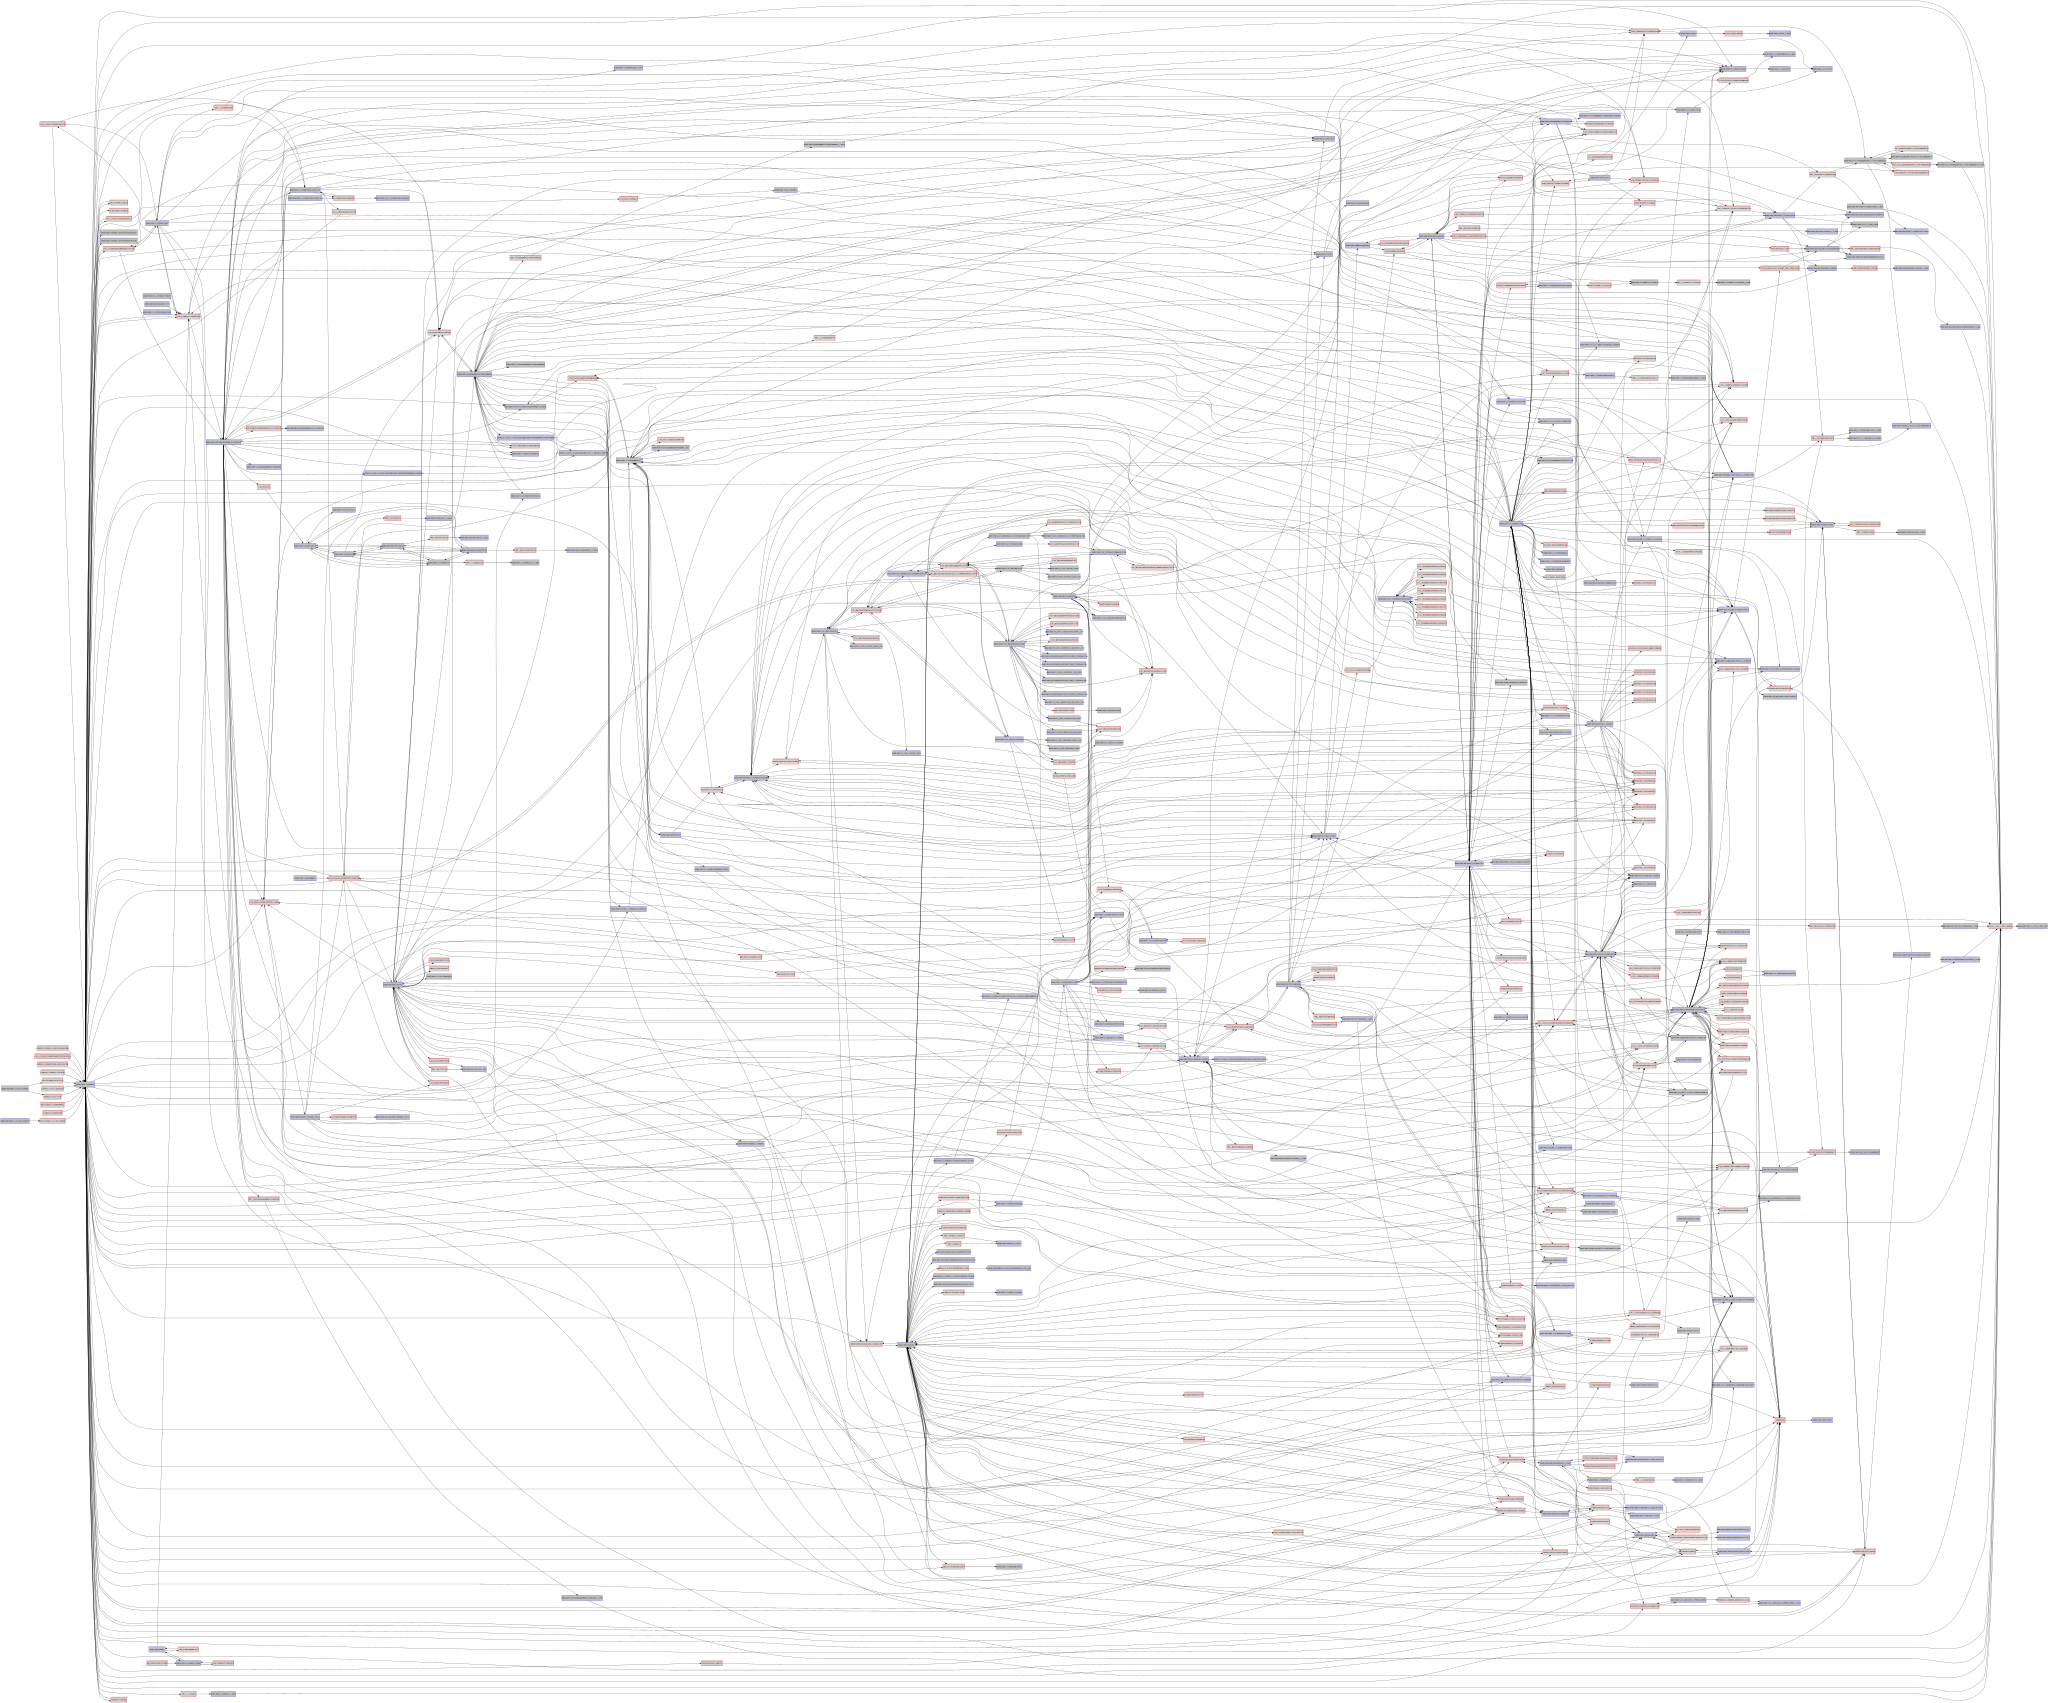

In [13]:
from IPython.display import SVG
SVG(filename='Digraph.gv.svg')